In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import math
import scipy
import copy
import os
import matplotlib.pyplot as plt

import llops as yp
import llops.simulation as sim
import ndoperators as ops

from libwallerlab.projects.motiondeblur import blurkernel
import libwallerlab.utilities.noise as noise
# plt.style.use('deblur')

yp.setDefaultBackend('numpy')
yp.setDefaultDatatype('float32')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
figure_output_directory = '/Users/zfphil/Dropbox/Berkeley/Phase-Deblurring/journalpaper/figures/'

## Load Object

0.0


<IPython.core.display.Javascript object>


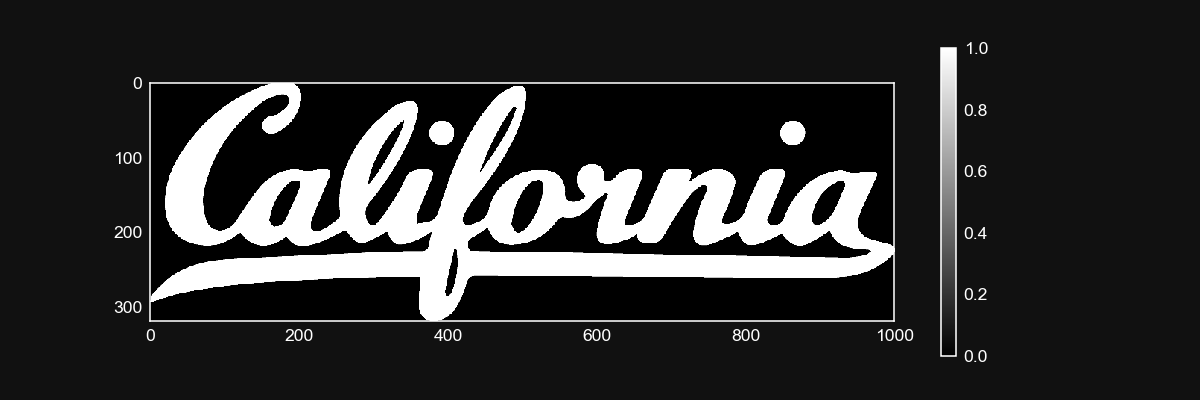

In [4]:
california = sim.california(min_value=0, max_value=1, invert=False, shape=(320, 1000))
plt.figure()
plt.imshow(california)
plt.colorbar()

## Generate Example Blurred Images

In [5]:
object_shape = (360, 1200)
image_shape = (360, 600)

# Generate object
object_true = np.abs(yp.pad(california, object_shape, center=True))

# Define Crop ROIs
roi_list = (yp.Roi(start=(0,0), shape=image_shape, input_shape=object_shape),
            yp.Roi(start=(0, object_shape[1] // 4), shape=image_shape, input_shape=object_shape), 
            yp.Roi(start=(0, object_shape[1] // 2), shape=image_shape, input_shape=object_shape))

# Generater Blur kernel
vector, dnf = blurkernel.vector(pulse_count=50)
kernel = blurkernel.fromVector(vector, object_shape)

# Define Operators
C = ops.Convolution(kernel)
G = ops.Segmentation(roi_list)

# Crop to measurements
measurement_list = ops.VecSplit(G * C * object_true,3)

## Save Ground Truth

<IPython.core.display.Javascript object>


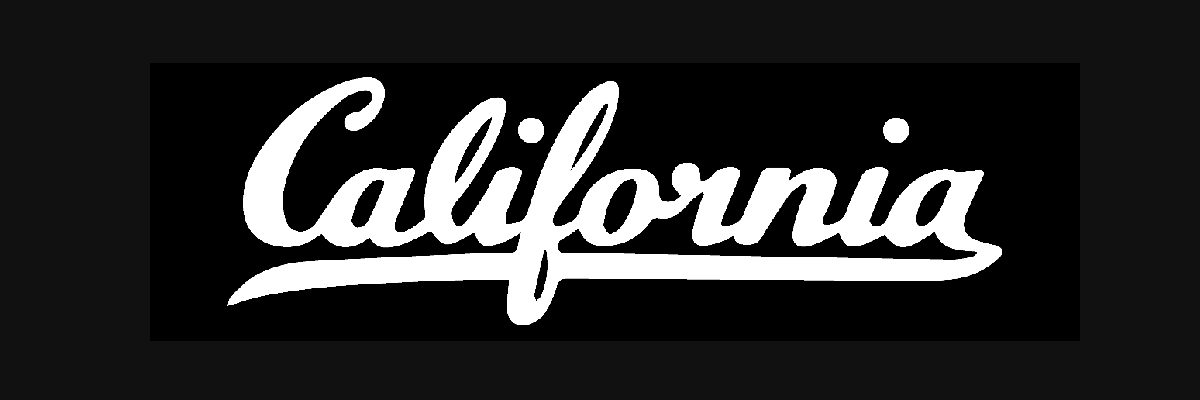

In [6]:
plt.figure()
plt.imshow(object_true)
plt.axis('off')
plt.savefig(figure_output_directory + 'system_ground_truth.pdf', transparent=True)

## Save Measurements

<IPython.core.display.Javascript object>


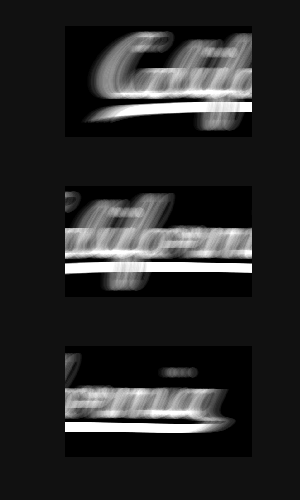

In [7]:
plt.figure(figsize=(3,5))
plt.subplot(311)
plt.imshow(measurement_list[0])
plt.axis('off')
plt.subplot(312)
plt.imshow(measurement_list[1])
plt.axis('off')
plt.subplot(313)
plt.imshow(measurement_list[2])
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'system_measurements.pdf', transparent=True)

<IPython.core.display.Javascript object>


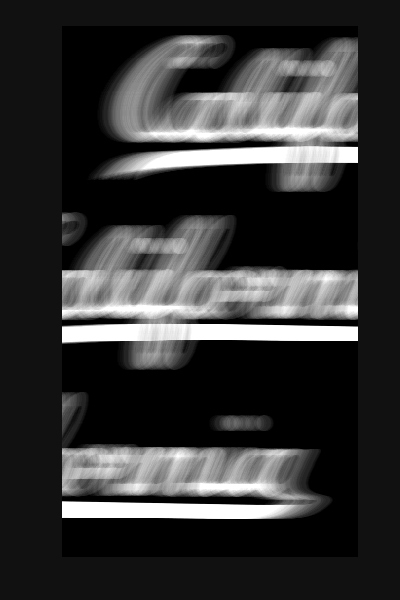

In [8]:
plt.figure(figsize=(4,6))
plt.imshow(ops.VecStack(measurement_list))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'system_measurements_stack.pdf', transparent=True)

## Save Windowing Functions (shifted)

<IPython.core.display.Javascript object>


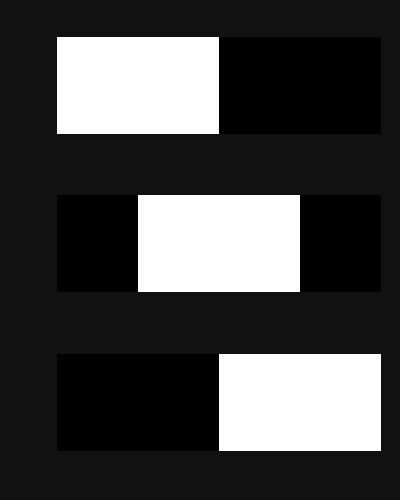

In [9]:
plt.figure(figsize=(4,5))
plt.subplot(311)
plt.imshow(roi_list[0].mask)
plt.axis('off')
plt.subplot(312)
plt.imshow(roi_list[1].mask)
plt.axis('off')
plt.subplot(313)
plt.imshow(roi_list[2].mask)
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'system_crop_operators_shifted.pdf', transparent=True)

## Save Windowing Functions (Unshifted)

<IPython.core.display.Javascript object>


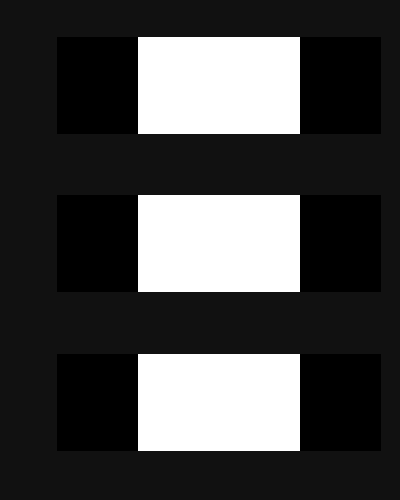

In [10]:
plt.figure(figsize=(4,5))
plt.subplot(311)
plt.imshow(roi_list[1].mask)
plt.axis('off')
plt.subplot(312)
plt.imshow(roi_list[1].mask)
plt.axis('off')
plt.subplot(313)
plt.imshow(roi_list[1].mask)
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'system_crop_operators_unshifted.pdf', transparent=True)

## Save Shifted Blur Kernels

<IPython.core.display.Javascript object>


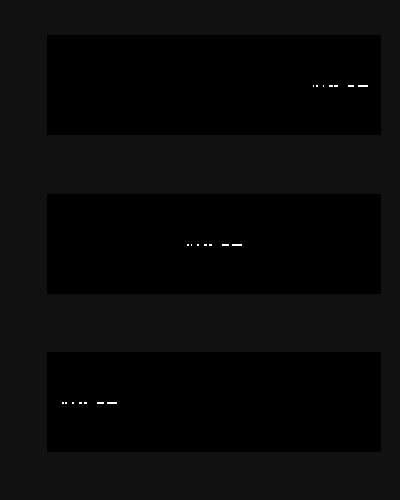

In [28]:
roi_crop = roi_list[1].decimate(6)
blur_kernel_zoom = blurkernel.fromVector(vector[:yp.shape(vector)[0]//3], roi_crop.input_shape)

plt.figure(figsize=(4,5))
plt.subplot(311)
plt.imshow(yp.circshift(blur_kernel_zoom, (0,75)))
plt.axis('off')
plt.subplot(312)
plt.imshow(blur_kernel_zoom)
plt.axis('off')
plt.subplot(313)
plt.imshow(yp.circshift(blur_kernel_zoom, (0,-75)))
plt.axis('off')
plt.tight_layout()
plt.savefig(figure_output_directory + 'system_kernel_stack.pdf', transparent=True)

## Save Blur Kernel

<IPython.core.display.Javascript object>


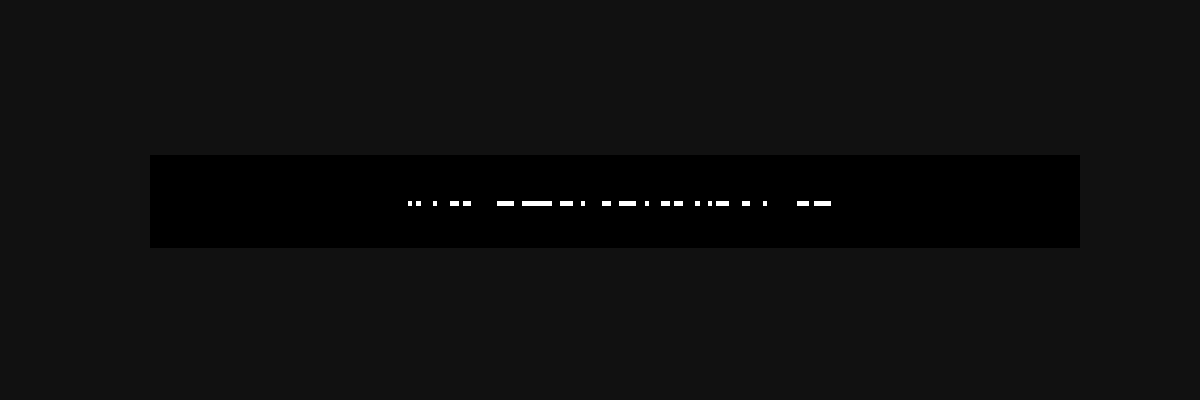

In [20]:
blur_kernel_zoom = blurkernel.fromVector(vector, (22,220))
plt.figure()
plt.imshow(blur_kernel_zoom)
plt.axis('off')
plt.savefig(figure_output_directory + 'system_kernel_zoom.pdf', transparent=True)

## Generate And Save Circulant Blurring Operator